In [1]:
!pip install nibabel

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import nibabel as nib
import numpy as np
import os
import pathlib
import matplotlib.pyplot as plt
import pandas as pd

In [26]:
base_img_path = f'/content/drive/MyDrive/TCIA/nnUNet/nnUNet_results/Dataset501_Glioblastoma/inference'
patients = os.listdir(base_img_path)
patients.sort()
# print(patients)
print(len(patients))
print(patients)

27
['101.nii.gz', '114.nii.gz', '117.nii.gz', '124.nii.gz', '135.nii.gz', '144.nii.gz', '151.nii.gz', '156.nii.gz', '166.nii.gz', '173.nii.gz', '174.nii.gz', '18.nii.gz', '189.nii.gz', '20.nii.gz', '201.nii.gz', '228.nii.gz', '254.nii.gz', '26.nii.gz', '270.nii.gz', '272.nii.gz', '275.nii.gz', '307.nii.gz', '35.nii.gz', '351.nii.gz', '43.nii.gz', '8.nii.gz', '93.nii.gz']


In [39]:
# Compute voxel volumes for Inference labels

pred_wt_vox = []
pred_core_vox = []
pred_et_vox = []
pred_ed_vox = []
patient_list = []

for patient in patients:

  img_path = f'/content/drive/MyDrive/TCIA/nnUNet/nnUNet_results/Dataset501_Glioblastoma/inference/{patient}'

  # Load image
  img = nib.load(img_path)

  # My segmentation files are named like this - 10.nii.gz, and I am extracting the patient ID, 10
  pid = patient.split('.')[0]

  #print ("Patient: ", pid)

  patient_list.append(pid)
  pred_wt_vox += [np.sum(img.get_fdata() > 0)]
  pred_core_vox += [np.sum(img.get_fdata() == 1)]
  pred_et_vox += [np.sum(img.get_fdata() == 2)]
  pred_ed_vox += [np.sum(img.get_fdata() == 3)]


pred_df = pd.DataFrame(list(zip(patient_list, pred_wt_vox, pred_core_vox, pred_et_vox, pred_ed_vox)), columns = ['Pred_Patient_ID', 'Predicted_WT', 'Predicted_Core', 'Predicted_ET', 'Predicted_ED'])


In [40]:
pred_df.head()

,Pred_Patient_ID,Predicted_WT,Predicted_Core,Predicted_ET,Predicted_ED
0,101,105313,9883,81175,14255
1,114,89193,21456,48835,18902
2,117,137107,9016,112605,15486
3,124,76144,19841,36754,19549
4,135,16506,0,15208,1298


In [31]:
gt_base_img_path = f'/content/drive/MyDrive/TCIA/nnUNet/nnUNet_results/Dataset501_Glioblastoma/ground_truth'
gt_patients = os.listdir(gt_base_img_path)
gt_patients.sort()
# print(patients)
print(len(gt_patients))
print(patients)

27
['101.nii.gz', '114.nii.gz', '117.nii.gz', '124.nii.gz', '135.nii.gz', '144.nii.gz', '151.nii.gz', '156.nii.gz', '166.nii.gz', '173.nii.gz', '174.nii.gz', '18.nii.gz', '189.nii.gz', '20.nii.gz', '201.nii.gz', '228.nii.gz', '254.nii.gz', '26.nii.gz', '270.nii.gz', '272.nii.gz', '275.nii.gz', '307.nii.gz', '35.nii.gz', '351.nii.gz', '43.nii.gz', '8.nii.gz', '93.nii.gz']


In [57]:
# Compute voxel volumes for GT labels

gt_wt_vox = []
gt_core_vox = []
gt_et_vox = []
gt_ed_vox = []

for patient in gt_patients:

  img_path = f'/content/drive/MyDrive/TCIA/nnUNet/nnUNet_results/Dataset501_Glioblastoma/ground_truth/{patient}'

  # Load image
  img = nib.load(img_path)

  gt_wt_vox += [np.sum(img.get_fdata() > 0)]
  gt_core_vox += [np.sum(img.get_fdata() == 1)]
  gt_et_vox += [np.sum(img.get_fdata() == 2)]
  gt_ed_vox += [np.sum(img.get_fdata() == 4)]

gt_df = pd.DataFrame(list(zip(patient_list, gt_wt_vox, gt_core_vox, gt_et_vox,gt_ed_vox)), columns = ['GT_Patient_ID', 'GT_WT', 'GT_Core', 'GT_ET', 'GT_ED'])


In [58]:
gt_df.head()

,GT_Patient_ID,GT_WT,GT_Core,GT_ET,GT_ED
0,101,66419,8598,41029,16792
1,114,91468,20446,46559,24463
2,117,188932,9562,164057,15313
3,124,75930,19846,35106,20978
4,135,18968,342,17230,1396


In [63]:
pred_df.reset_index(drop=True, inplace=True)
gt_df.reset_index(drop=True, inplace=True)

merged_df = pd.concat([pred_df, gt_df], axis=1)

In [64]:
merged_df.head()

,Pred_Patient_ID,Predicted_WT,Predicted_Core,Predicted_ET,Predicted_ED,GT_Patient_ID,GT_WT,GT_Core,GT_ET,GT_ED
0,101,105313,9883,81175,14255,101,66419,8598,41029,16792
1,114,89193,21456,48835,18902,114,91468,20446,46559,24463
2,117,137107,9016,112605,15486,117,188932,9562,164057,15313
3,124,76144,19841,36754,19549,124,75930,19846,35106,20978
4,135,16506,0,15208,1298,135,18968,342,17230,1396


In [65]:
# F5 (proportion of enhancing tumor) and F14 (proportion of edema) for Predicted images
merged_df['Pred_ET_WT'] = merged_df['Predicted_ET'] / merged_df['Predicted_WT']
merged_df['Pred_ED_WT'] = merged_df['Predicted_ED'] / merged_df['Predicted_WT']

# F5 (proportion of enhancing tumor) and F14 (proportion of edema) for Ground Truth images
merged_df['GT_ET_WT'] = merged_df['GT_ET'] / merged_df['GT_WT']
merged_df['GT_ED_WT'] = merged_df['GT_ED'] / merged_df['GT_WT']

In [66]:
merged_df.head()

,Pred_Patient_ID,Predicted_WT,Predicted_Core,Predicted_ET,Predicted_ED,GT_Patient_ID,GT_WT,GT_Core,GT_ET,GT_ED,Pred_ET_WT,Pred_ED_WT,GT_ET_WT,GT_ED_WT
0,101,105313,9883,81175,14255,101,66419,8598,41029,16792,0.770798,0.135358,0.617730,0.252819
1,114,89193,21456,48835,18902,114,91468,20446,46559,24463,0.547521,0.211922,0.509020,0.267449
2,117,137107,9016,112605,15486,117,188932,9562,164057,15313,0.821293,0.112948,0.868339,0.081050
3,124,76144,19841,36754,19549,124,75930,19846,35106,20978,0.482691,0.256737,0.462347,0.276281
4,135,16506,0,15208,1298,135,18968,342,17230,1396,0.921362,0.078638,0.908372,0.073598


Pearsons correlation: 0.941


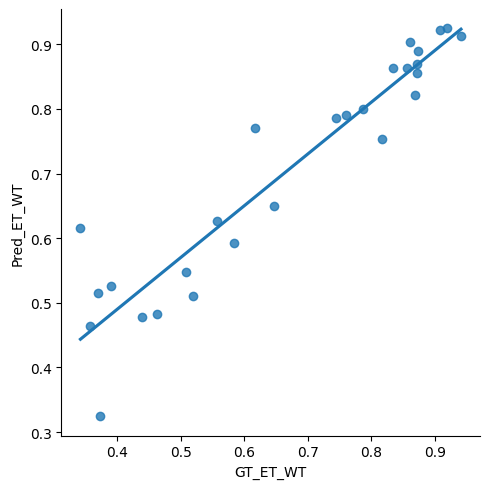

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm

_ = sns.lmplot(x='GT_ET_WT', y='Pred_ET_WT', data=merged_df, ci=None)
et_corr, _ = pearsonr(merged_df['GT_ET_WT'], merged_df['Pred_ET_WT'])
print('Pearsons correlation: %.3f' % et_corr)

Pearsons correlation: 0.846


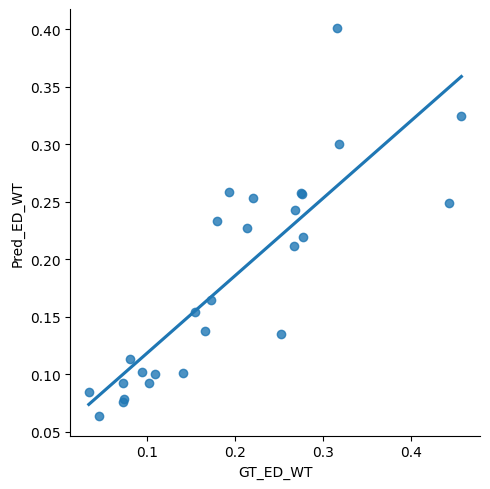

In [68]:
_ = sns.lmplot(x='GT_ED_WT', y='Pred_ED_WT', data=merged_df, ci=None)
et_corr, _ = pearsonr(merged_df['GT_ED_WT'], merged_df['Pred_ED_WT'])
print('Pearsons correlation: %.3f' % et_corr)

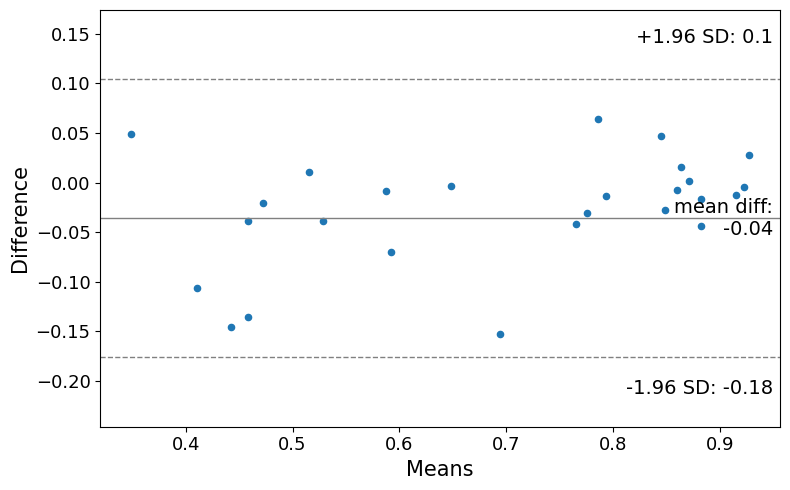

In [69]:
# Create Bland-Altman plot for ET
f, ax = plt.subplots(1, figsize = (8,5))
sm.graphics.mean_diff_plot(merged_df['GT_ET_WT'], merged_df['Pred_ET_WT'], ax = ax)

#display Bland-Altman plot
plt.show()

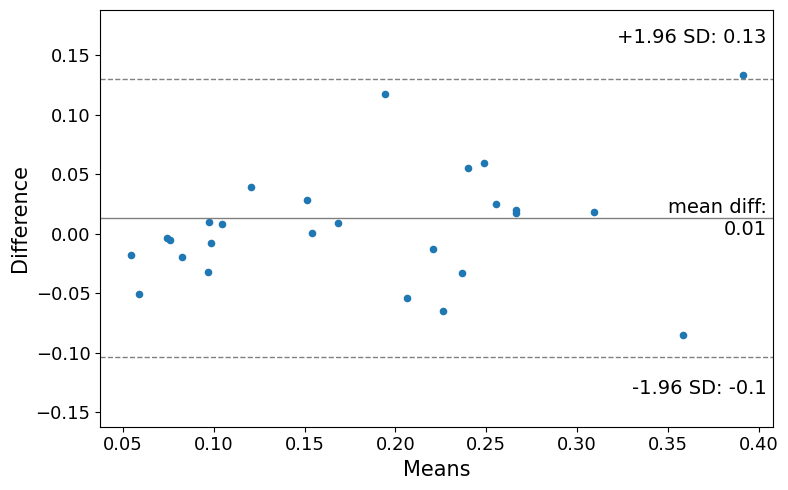

In [70]:
#create Bland-Altman plot for ED
f, ax = plt.subplots(1, figsize = (8,5))
sm.graphics.mean_diff_plot(merged_df['GT_ED_WT'], merged_df['Pred_ED_WT'], ax = ax)

#display Bland-Altman plot
plt.show()